In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Image is stored in MATLAB dataset
X = sio.loadmat('ex7faces.mat')
X = pd.DataFrame(X['X'])
#Normalize data by subtracting mean and scaling (normalize each sample (row))
X_norm = normalize(X)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14.133686,9.133686,19.133686,18.133686,12.133686,-18.866314,-38.866314,-41.866314,-51.866314,-33.866314,...,-28.866314,-27.866314,-12.866314,8.133686,34.133686,67.133686,76.133686,56.133686,48.133686,57.133686
4996,-61.866314,-64.866314,-64.866314,-68.866314,-71.866314,-74.866314,-72.866314,-72.866314,-71.866314,-72.866314,...,26.133686,17.133686,14.133686,26.133686,37.133686,29.133686,28.133686,15.133686,10.133686,18.133686
4997,-46.866314,-24.866314,-8.866314,-11.866314,-26.866314,3.133686,20.133686,17.133686,13.133686,5.133686,...,-10.866314,-9.866314,-7.866314,-4.866314,-3.866314,0.133686,53.133686,90.133686,80.133686,59.133686
4998,19.133686,16.133686,14.133686,12.133686,10.133686,10.133686,12.133686,11.133686,14.133686,14.133686,...,-34.866314,-52.866314,-68.866314,-65.866314,-47.866314,-44.866314,-38.866314,-38.866314,-41.866314,-46.866314


In [9]:
# channels by samples (that's how svd wants it)
X_norm.T.shape

(1024, 5000)

# let's compress the data by zeroing out some COMPONENTS.
# components are projections of data onto the eigenvectors.
# alternatively, you can zero out the eigenvectors instead of components

Text(0.5, 0.98, 'Eigenfaces\n You can think of them as spatial filters')

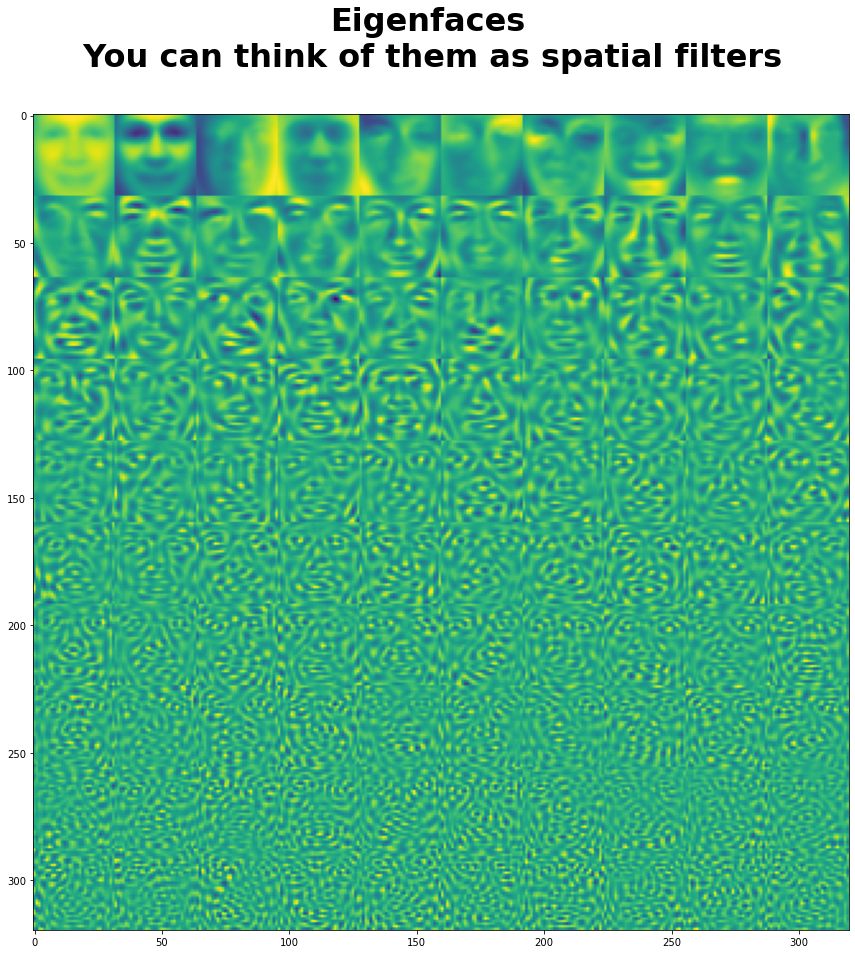

In [40]:
U,S,V = np.linalg.svd(X_norm.T)
n = 100

eigenfaces = np.zeros((int(np.sqrt(n) * np.sqrt(U.shape[0])),
                       (int(np.sqrt(n) * np.sqrt(U.shape[0])))))

for i in range(int(np.sqrt(n))):
    for j in range(int(np.sqrt(n))):
        eigenface = U[:, i*32 + j].reshape(32,32).T
        eigenface /= eigenface.max()
        eigenfaces[i*32:(i+1)*32, j*32:(j+1)*32 ] = eigenface
        
plt.figure(figsize=(15,15))
plt.imshow(eigenfaces)
plt.suptitle('Eigenfaces\n You can think of them as spatial filters', fontsize=32, weight='bold')
    

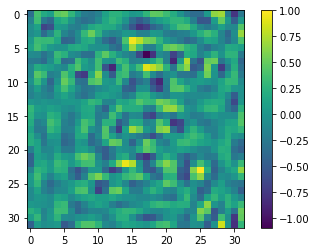

In [41]:
plt.imshow(U[:,7*32].reshape(32,32).T)
plt.colorbar()

In [38]:
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

Z = zca_whitening_matrix(X.T)
Z.shape

(1024, 1024)

<ipython-input-66-93ee4fb9bd38>:5: RuntimeWarning: divide by zero encountered in true_divide
  ax1.loglog(x, S.max() * 1/x**0.64, label='$y = 30 \frac{1}{x^{0.64}}$')


Text(0.5, 0.98, 'The eigenspectrum of whitened (any decorrelated data) is very shallow')

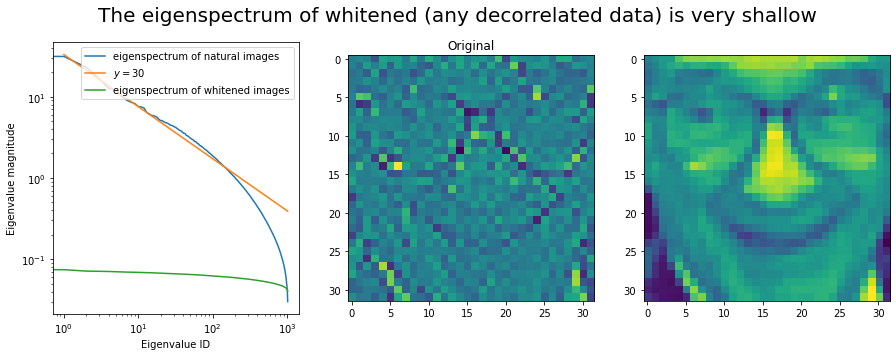

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

x = np.linspace(0, len(S), len(S))
ax1.loglog(x, S, label='eigenspectrum of natural images')
ax1.loglog(x, S.max() * 1/x**0.64, label='$y = 30 \frac{1}{x^{0.64}}$')

Xw = Z.dot(X_norm.T)
Uw,Sw,Vw = np.linalg.svd(Xw)

ax1.loglog(x, Sw, label='eigenspectrum of whitened images')
ax1.set_xlabel('Eigenvalue ID')
ax1.set_ylabel('Eigenvalue magnitude')
ax1.legend()

ax2.imshow(Xw.T[0, :].reshape(32,32).T)
ax2.set_title('Whitened')
ax3.imshow(X_norm[0, :].reshape(32,32).T)
ax2.set_title('Original')
plt.suptitle('The eigenspectrum of whitened (any decorrelated data) is very shallow', fontsize=20)

(1024, 1024) (5000, 5000) (5000, 1024)


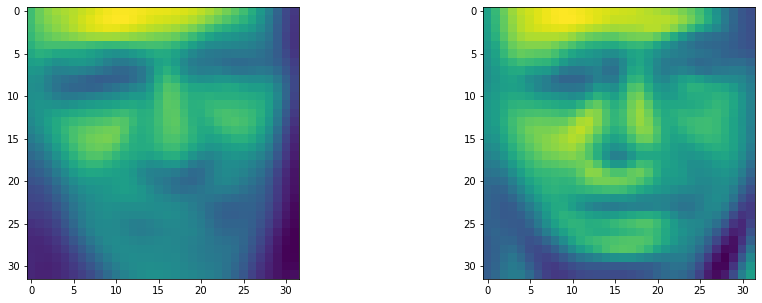

In [12]:
# eigendecomposition
U,S,V = np.linalg.svd(X_norm.T)
print(U.shape, V.shape, X_norm.shape)

# zero out weaker components (weaker components correspond to smaller eigenvectors).
# in other words, we could zeroed out the weak eigenvectors instead
C = U.T.dot(X_norm.T)
C[10:,:] = 0 # zero out all the components (don't confuse with eigenvectors) starting from 20
# zero out all the components (don't confuse with eigenvectors) starting from 50
C1 = U.T.dot(X_norm.T)
C1[50:,:] = 0 
# back-project to feature space (in EEG this is sensor space.
# Therefore, componets are would be SOURCE activations)
# we write that back-projection X_hat = U * C because 
# U.T = inv(U) for orthogonal matrices (eigenvectors (in columns of U) are orthogonal)
# you can check it
# (U - np.linalg.inv(U.T)).sum() = -2.200e-13
# back-project to the feature space
X_hat = U.dot(C) # using only two components (lower-dimesional signal)
X_hat1 = U.dot(C1) # using only 50 componets (higher-dimesional signal)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.imshow(X_hat[:,1].reshape(32,32).T)
ax2.imshow(X_hat1[:,1].reshape(32,32).T)

Text(0.5, 0.98, 'Eigenspectrum of natural images')

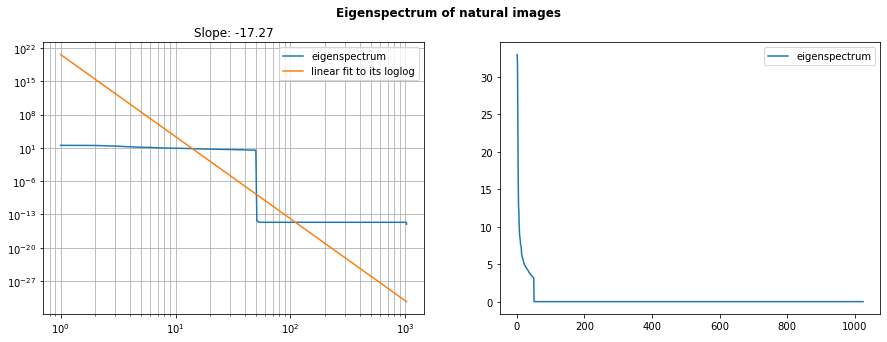

In [211]:
x = range(1, len(S) + 1)
logx = np.log(x[2:110])
logy = np.log(S[2:110])
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.loglog(x, S, label='eigenspectrum')
plt.loglog(x, yfit(x), label='linear fit to its loglog')
plt.title('Slope: {:.2f}'.format(coeffs[0]))
plt.grid(True, which="both")
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, S, label='eigenspectrum')
plt.legend()
plt.suptitle('Eigenspectrum of natural images', weight='bold')

# if we remove some of the componets, the eigenspectrum becomes much steeper
, indicating that despite the data being equeally dimensional (as the original data), the underlying signal is lower-dimensional (i.e. only a few components are enough to capture most of the signal)

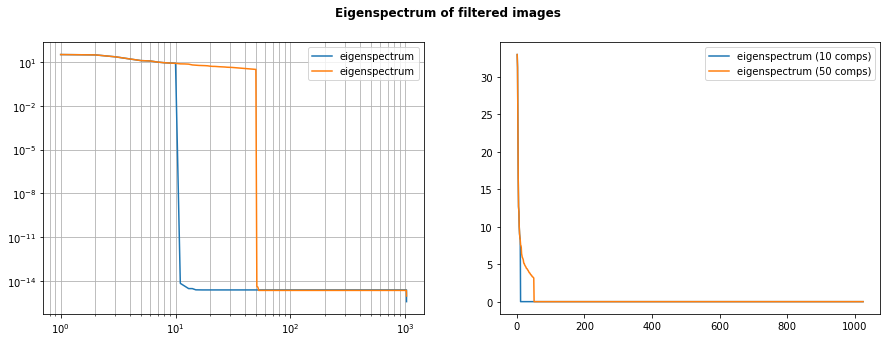

In [212]:
import warnings

with warnings.catch_warnings(record=True):
    # let's obtain the eigenspectrum of the higher and lowerdimensional signals
    U,S,V = np.linalg.svd(X_hat.T)


    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.loglog(x, S, label='eigenspectrum')
    plt.grid(True, which="both")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, S, label='eigenspectrum (10 comps)')

    # let's obtain the eigenspectrum of the higher and lowerdimensional signals
    U,S,V = np.linalg.svd(X_hat1.T)

    plt.subplot(1,2,1)
    plt.loglog(x, S, label='eigenspectrum')
    plt.grid(True, which="both")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, S, label='eigenspectrum (50 comps)')
    plt.legend()
    plt.suptitle('Eigenspectrum of filtered images', weight='bold')

# image compression example

In [264]:
# eigendecomposition
U,S,V = np.linalg.svd(X_norm.T)
print(U.shape, V.shape, X_norm.shape)

(1024, 1024) (5000, 5000) (5000, 1024)


In [265]:
# get components. 
# components are projections of data/signal/images into the eigenspace. Eigenspace is
# the space spanned by one or more eigenvectors.
comps = U.T.dot(X_norm.T)
comps.shape

(1024, 5000)

In [266]:
# now let's compress the images
# to do that we back-project the data from the eigenspace into the original space
# in EEG that would be projecting sources into the sensor space
# here we take 10 components and back-project them into the original space
# which means more than 100x compression of the original data (1024D to 10D)

npcomps = 10
backproj = U[:,:npcomps].dot(comps[:npcomps,:])
backproj.shape

(1024, 5000)

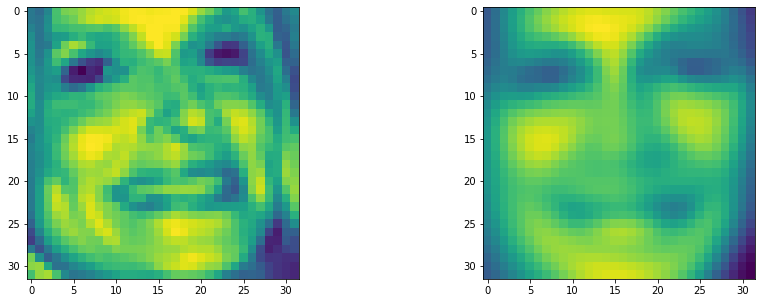

In [267]:
idx = 10
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.imshow(X_norm.T[:,idx].reshape(32,32).T)
ax2.imshow(backproj[:,idx].reshape(32,32).T)